# Training a model with a curated image dataset in fastai with dataset augmentation
Walkthrough of how to train a deep learning model in fastai with a curated image dataset incorporating an augmented dataset


In [24]:
# imports for notebook boilerplate
!pip install -Uqq fastbook
import fastbook
from fastbook import *
from fastai.vision.all import *
modifier = 'jun16_2021'

In [25]:
# define timestamp string for saving models
modifier = datetime.now().strftime("%Y%m%d-%H%M%S")
# define path for saving models - update this path for your Gradient or Colab instance
model_path = '/notebooks/temp'

In [26]:
# set up the notebook for fast.ai
fastbook.setup_book()

# Ingest the dataset
- create a path object
- defined an ImageDataLoaders object

In [27]:
# ingest the curated image dataset CIFAR
path = untar_data(URLs.CIFAR)

In [28]:
path

Path('/storage/data/cifar10')

In [29]:
# examine the directory structure of the dataset
path.ls()

(#3) [Path('/storage/data/cifar10/train'),Path('/storage/data/cifar10/labels.txt'),Path('/storage/data/cifar10/test')]

In [30]:
# define a DataBlock object
db = DataBlock(blocks = (ImageBlock, CategoryBlock),
                 get_items=get_image_files,
                 splitter=RandomSplitter(seed=42),
                 get_y=parent_label)

In [31]:
dls = db.dataloaders(path/'train',bs=32)

In [32]:
# summary must be run on DataBlock object, not dataloaders object
db.summary(path/"train")

Setting-up type transforms pipelines
Found 50000 items
2 datasets of sizes 40000,10000
Setting up Pipeline: PILBase.create
Setting up Pipeline: parent_label -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}

Building one sample
  Pipeline: PILBase.create
    starting from
      /storage/data/cifar10/train/truck/3702_truck.png
    applying PILBase.create gives
      PILImage mode=RGB size=32x32
  Pipeline: parent_label -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}
    starting from
      /storage/data/cifar10/train/truck/3702_truck.png
    applying parent_label gives
      truck
    applying Categorize -- {'vocab': None, 'sort': True, 'add_na': False} gives
      TensorCategory(9)

Final sample: (PILImage mode=RGB size=32x32, TensorCategory(9))


Setting up after_item: Pipeline: ToTensor
Setting up before_batch: Pipeline: 
Setting up after_batch: Pipeline: IntToFloatTensor -- {'div': 255.0, 'div_mask': 1}

Building one batch
Applying item_tfms to the firs

In [33]:
# define a DataBlock object for the test set
db_test = DataBlock(blocks = (ImageBlock, CategoryBlock),
                 get_items=get_image_files,
                 splitter=RandomSplitter(valid_pct=0.99,seed=42),
                 get_y=parent_label)

In [34]:
# summary must be run on DataBlock object, not dataloaders object
db_test.summary(path/"train")

Setting-up type transforms pipelines
Found 50000 items
2 datasets of sizes 500,49500
Setting up Pipeline: PILBase.create
Setting up Pipeline: parent_label -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}

Building one sample
  Pipeline: PILBase.create
    starting from
      /storage/data/cifar10/train/bird/44595_bird.png
    applying PILBase.create gives
      PILImage mode=RGB size=32x32
  Pipeline: parent_label -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}
    starting from
      /storage/data/cifar10/train/bird/44595_bird.png
    applying parent_label gives
      bird
    applying Categorize -- {'vocab': None, 'sort': True, 'add_na': False} gives
      TensorCategory(2)

Final sample: (PILImage mode=RGB size=32x32, TensorCategory(2))


Setting up after_item: Pipeline: ToTensor
Setting up before_batch: Pipeline: 
Setting up after_batch: Pipeline: IntToFloatTensor -- {'div': 255.0, 'div_mask': 1}

Building one batch
Applying item_tfms to the first sam

# Examine the dataset

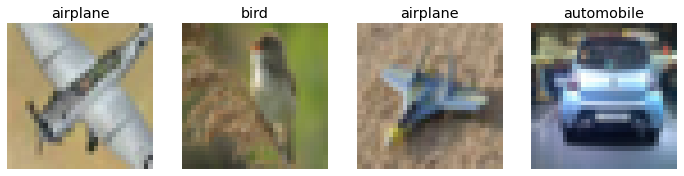

In [35]:
# show a batch of training data
dls.train.show_batch(max_n=4, nrows=1)


In [36]:
# examine the train subdirectory
(path/'train').ls()

(#10) [Path('/storage/data/cifar10/train/horse'),Path('/storage/data/cifar10/train/dog'),Path('/storage/data/cifar10/train/ship'),Path('/storage/data/cifar10/train/frog'),Path('/storage/data/cifar10/train/truck'),Path('/storage/data/cifar10/train/deer'),Path('/storage/data/cifar10/train/airplane'),Path('/storage/data/cifar10/train/automobile'),Path('/storage/data/cifar10/train/cat'),Path('/storage/data/cifar10/train/bird')]

In [37]:
(path/'train/dog').ls()

(#5000) [Path('/storage/data/cifar10/train/dog/26785_dog.png'),Path('/storage/data/cifar10/train/dog/47662_dog.png'),Path('/storage/data/cifar10/train/dog/48730_dog.png'),Path('/storage/data/cifar10/train/dog/40889_dog.png'),Path('/storage/data/cifar10/train/dog/24363_dog.png'),Path('/storage/data/cifar10/train/dog/44046_dog.png'),Path('/storage/data/cifar10/train/dog/26962_dog.png'),Path('/storage/data/cifar10/train/dog/19003_dog.png'),Path('/storage/data/cifar10/train/dog/47416_dog.png'),Path('/storage/data/cifar10/train/dog/31111_dog.png')...]

In [38]:
(path/'train/cat').ls()

(#5000) [Path('/storage/data/cifar10/train/cat/1845_cat.png'),Path('/storage/data/cifar10/train/cat/26087_cat.png'),Path('/storage/data/cifar10/train/cat/24817_cat.png'),Path('/storage/data/cifar10/train/cat/47541_cat.png'),Path('/storage/data/cifar10/train/cat/44852_cat.png'),Path('/storage/data/cifar10/train/cat/37669_cat.png'),Path('/storage/data/cifar10/train/cat/11236_cat.png'),Path('/storage/data/cifar10/train/cat/4329_cat.png'),Path('/storage/data/cifar10/train/cat/44859_cat.png'),Path('/storage/data/cifar10/train/cat/22425_cat.png')...]

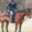

In [39]:
# take a look at one of the images
img_files = get_image_files(path)
img = PILImage.create(img_files[100])
img

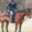

In [40]:
# display a thumbnail of the image
img.to_thumb(180)

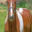

In [41]:
img = PILImage.create(img_files[3000])
img

# Define and train the model

In [42]:
# define the model
learn = cnn_learner(dls, resnet18, 
                    loss_func=LabelSmoothingCrossEntropy(), 
                    metrics=accuracy)

epoch,train_loss,valid_loss,accuracy,time
0,1.854901,1.760504,0.437800,01:24


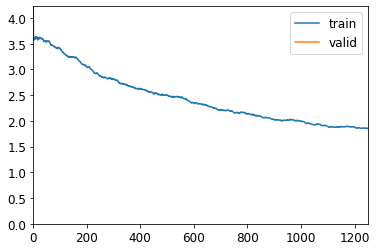

epoch,train_loss,valid_loss,accuracy,time
0,1.273648,1.152343,0.717600,01:47
1,1.159961,1.071841,0.746600,01:45


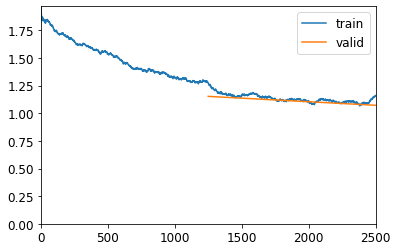

CPU times: user 4min 46s, sys: 5.18 s, total: 4min 51s
Wall time: 4min 57s


In [43]:
%%time
learn.fine_tune(2,cbs=ShowGraphCallback())

In [44]:
learn.summary()

Sequential (Input shape: ['32 x 3 x 32 x 32'])
Layer (type)         Output Shape         Param #    Trainable 
Conv2d               32 x 64 x 16 x 16    9,408      True      
________________________________________________________________
BatchNorm2d          32 x 64 x 16 x 16    128        True      
________________________________________________________________
ReLU                 32 x 64 x 16 x 16    0          False     
________________________________________________________________
MaxPool2d            32 x 64 x 8 x 8      0          False     
________________________________________________________________
Conv2d               32 x 64 x 8 x 8      36,864     True      
________________________________________________________________
BatchNorm2d          32 x 64 x 8 x 8      128        True      
________________________________________________________________
ReLU                 32 x 64 x 8 x 8      0          False     
___________________________________________________

In [45]:
# save the model trained with non-augmented data using the trick to specify a writeable directory
save_path = learn.path
learn.path = Path(model_path)
learn.save('cifar_save_'+modifier)
learn.path = save_path

# Try augmenting the training set

In [46]:
# create a new DataBlock object incorporating augmentation transformations
db2 = db.new(batch_tfms=aug_transforms())
# create a new dataloaders object based on the new DataBlock object
dls2 = db2.dataloaders(path/'train',bs=32)


In [47]:
db2.summary(path/"train")

Setting-up type transforms pipelines
Found 50000 items
2 datasets of sizes 40000,10000
Setting up Pipeline: PILBase.create
Setting up Pipeline: parent_label -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}

Building one sample
  Pipeline: PILBase.create
    starting from
      /storage/data/cifar10/train/truck/3702_truck.png
    applying PILBase.create gives
      PILImage mode=RGB size=32x32
  Pipeline: parent_label -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}
    starting from
      /storage/data/cifar10/train/truck/3702_truck.png
    applying parent_label gives
      truck
    applying Categorize -- {'vocab': None, 'sort': True, 'add_na': False} gives
      TensorCategory(9)

Final sample: (PILImage mode=RGB size=32x32, TensorCategory(9))


Setting up after_item: Pipeline: ToTensor
Setting up before_batch: Pipeline: 
Setting up after_batch: Pipeline: IntToFloatTensor -- {'div': 255.0, 'div_mask': 1} -> Flip -- {'size': None, 'mode': 'bilinear', 'pad

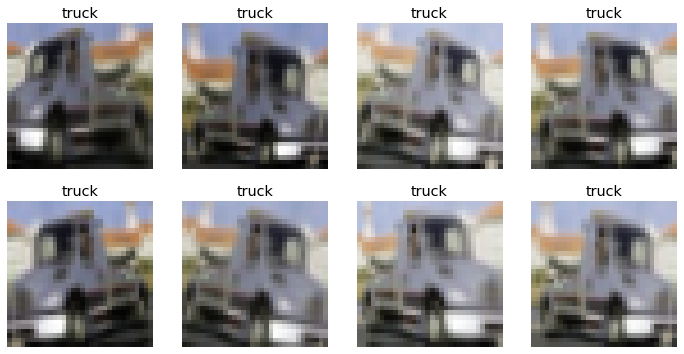

In [48]:
# examine a batch of the augmented training data
dls2.train.show_batch(unique=True,max_n=8, nrows=2)

In [49]:
# define a distinct model based on the augmented dataloaders object
learn2 = cnn_learner(dls2, resnet18, 
                    loss_func=LabelSmoothingCrossEntropy(), 
                    metrics=accuracy)

In [50]:
%%time
learn2.fine_tune(2)

epoch,train_loss,valid_loss,accuracy,time
0,1.904604,1.721611,0.454900,01:42


epoch,train_loss,valid_loss,accuracy,time
0,1.349169,1.212078,0.688800,02:02
1,1.173122,1.107309,0.731700,01:57


CPU times: user 5min 29s, sys: 6.9 s, total: 5min 36s
Wall time: 5min 42s


In [51]:
learn2.summary()

Sequential (Input shape: ['32 x 3 x 32 x 32'])
Layer (type)         Output Shape         Param #    Trainable 
Conv2d               32 x 64 x 16 x 16    9,408      True      
________________________________________________________________
BatchNorm2d          32 x 64 x 16 x 16    128        True      
________________________________________________________________
ReLU                 32 x 64 x 16 x 16    0          False     
________________________________________________________________
MaxPool2d            32 x 64 x 8 x 8      0          False     
________________________________________________________________
Conv2d               32 x 64 x 8 x 8      36,864     True      
________________________________________________________________
BatchNorm2d          32 x 64 x 8 x 8      128        True      
________________________________________________________________
ReLU                 32 x 64 x 8 x 8      0          False     
___________________________________________________

In [52]:
# save the model trained with the augmented dataset using the trick to specify a writeable directory
save_path = learn2.path
learn2.path = Path(model_path)
learn2.save('cifar_augmented_save_'+modifier)
learn2.path = save_path

# Examine the performance of the model trained with non-augmented data on the test set


In [53]:
# define a dataloader object on the test dataset
dls_test = db_test.dataloaders(path/'test',bs=32)

In [54]:
# define a model for the test dataset
learn_test = cnn_learner(dls_test, resnet18, 
                    loss_func=LabelSmoothingCrossEntropy(), 
                    metrics=accuracy)

In [55]:
# point the model's path to where the weights were saved and load the weights for the model trained with non-augmented data
learn_test.path = Path(model_path)
learn_test.load('cifar_save_'+modifier)

In [56]:
learn_test.validate()

(#2) [1.060638427734375,0.7527272701263428]

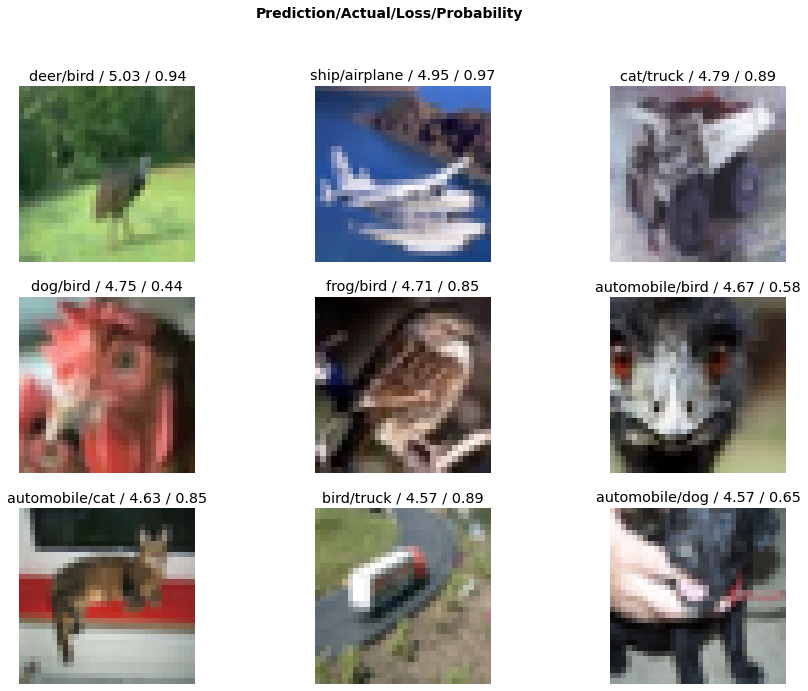

In [57]:
interp_test = ClassificationInterpretation.from_learner(learn_test)
# examine the images from the training set with the biggest loss
interp_test.plot_top_losses(9, figsize=(15,11))


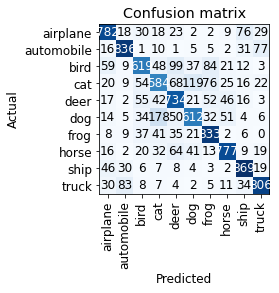

In [58]:
# plot the confusion matrix
interp_test.plot_confusion_matrix()

# Examine the performance of the model trained on the augmented dataset on the test set

In [59]:
# define a dataloader object on the test dataset
dls_test = db_test.dataloaders(path/'test',bs=32)

In [60]:
# define a model for the augmented dataset
learn_augment_test = cnn_learner(dls_test, resnet18, 
                    loss_func=LabelSmoothingCrossEntropy(), 
                    metrics=accuracy)

In [61]:
# point the model's path to where the weights were saved and load the weights for the model trained with augmented data
learn_augment_test.path = Path(model_path)
learn_augment_test.load('cifar_augmented_save_'+modifier)

In [62]:
learn_augment_test.validate()

(#2) [1.1042197942733765,0.7330303192138672]

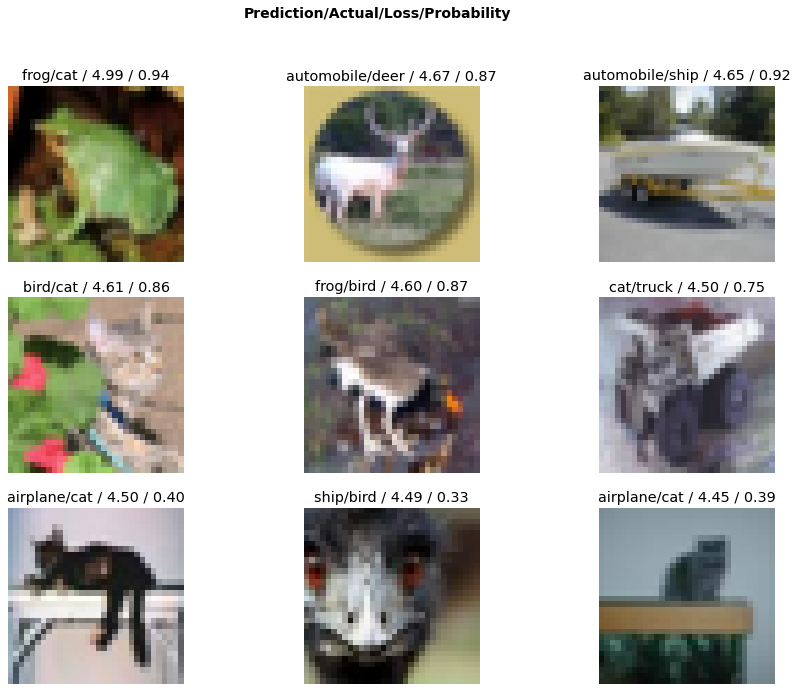

In [63]:
# show confusion matrix for the test dataset
interp_augment_test = ClassificationInterpretation.from_learner(learn_augment_test)
# examine the images from the training set with the biggest loss
interp_augment_test.plot_top_losses(9, figsize=(15,11))


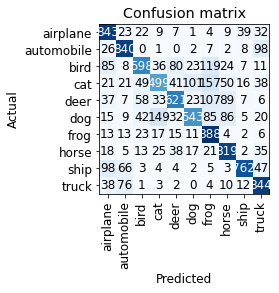

In [64]:
interp_augment_test.plot_confusion_matrix()